In [1]:
import sys,os
import glob
import torch,dill
import torchvision.utils as vutils
import matplotlib.pyplot as plt
from iresnet import iResBlock
from iEluNetwork import iConv2d
from spectral_norm import SN

In [2]:
paths = glob.glob(os.path.expanduser('~/tb-experiments/iresnet_WTW/**/*.trainer'),recursive=True)
elu_paths = glob.glob(os.path.expanduser('~/tb-experiments/elu_flow/**/*.trainer'),recursive=True)
paths = elu_paths
print(paths)


['/home/marc/tb-experiments/elu_flow/CIFAR10/iEluNet/trial0/checkpoints/c10.trainer']


In [3]:
trainer = torch.load(paths[-1],pickle_module=dill)
trainer.model.eval();

/home/marc/anaconda3/lib/python3.6/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'iEluNetwork.iEluNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/marc/anaconda3/lib/python3.6/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'iEluNetwork.iConv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [5]:
def change_tol(module):
    if isinstance(module,iResBlock):
        module.inverse_tol=1e-10
        print(module.iters_per_reverse)
    if isinstance(module,SN):
        print(module._s)
    if isinstance(module,iConv2d):
        print(module._reverse_iters)
        try: print(module.iters_per_reverse)
        except ZeroDivisionError: pass

In [6]:
for mb in trainer.dataloaders['dev']:
    break
inp =x=mb[0][:1]
trainer.model.apply(change_tol);

0
0
0
0
0
0
0
0
0


In [7]:
with torch.no_grad():
    output = trainer.model.body(inp)
    inp_rec = trainer.model.inverse(output)

AssertionError: lgmres failed with info 500

(array([5.120e+02, 4.407e+03, 9.102e+03, 2.272e+03, 7.300e+01, 2.000e+00,
        6.000e+00, 2.000e+00, 6.000e+00, 2.000e+00]),
 array([-0.15206987,  0.01379179,  0.17965345,  0.34551511,  0.51137677,
         0.67723843,  0.84310009,  1.00896176,  1.17482342,  1.34068508,
         1.50654674]),
 <a list of 10 Patch objects>)

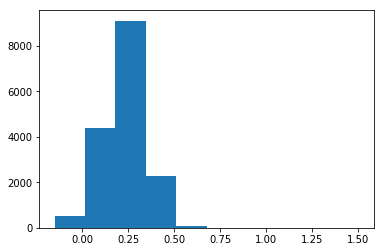

In [9]:
plt.hist(output.cpu().numpy().reshape(-1))

In [ ]:
with torch.no_grad():
    output = trainer.model[1].body(inp)

In [ ]:
sampled_imgs = trainer.model.sample(32).cpu().data

In [ ]:
grid = vutils.make_grid(sampled_imgs, normalize=True)
plt.imshow(grid.permute(1,2,0))

In [ ]:
grid.shape

In [ ]:
list(z_.shape for z_ in output)

In [ ]:
with torch.no_grad():
    inp_reconstructed = trainer.model[1].body.inverse(output);

In [ ]:
((inp_reconstructed[0] - inp[0]).norm()/(inp[0]).norm())

In [ ]:
plt.hist(inp_reconstructed[0].cpu().data.numpy().reshape(-1),alpha=.5)
plt.hist(inp[0].cpu().data.numpy().reshape(-1),alpha=.5)

In [ ]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
#print(y.shape)
grid = vutils.make_grid(mb[0]).cpu().data.numpy().transpose(1,2,0)
plt.imshow(grid)
plt.show()
grid = vutils.make_grid(inp_reconstructed).cpu().data.numpy().transpose(1,2,0)
plt.imshow(grid)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [ ]:
for zi in z: print(zi.shape)